Left Down point: 172940 2499920
Right Up point:  178940 2511100
height (min, max) -4.53 535.81


0.0 535.81
0.0 535.81
(58.6, 111.8, 0.8094)
(58.8, 111.8, 0.9294)
(59.0, 111.8, 1.0233)
(59.2, 111.8, 1.0182)
(59.4, 111.8, 1.1902)
(59.6, 111.8, 1.2993)
(59.8, 111.8, 1.4152)
(60.0, 111.8, 1.546)


[(26.8, 0.2, 0.0591), (27.0, 0.2, 0.0792), (27.2, 0.2, 0.0888), (27.4, 0.2, 0.0338), (27.6, 0.2, 0.0443)]


Done


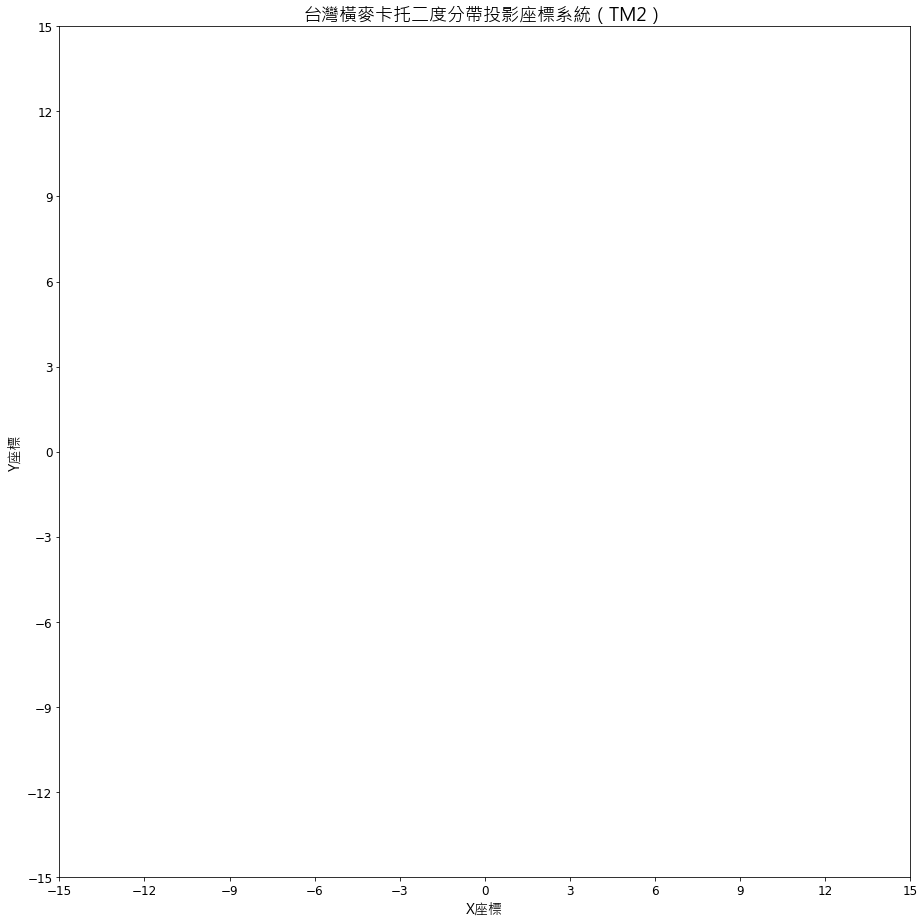

In [7]:
# SSNP-03.py
# 2021-11-15
#
# read dem-all-1.csv file, 
# adjust left down origin point, 
# adjust x,y,z value by factor 0.01
# write out dem-all-2.csv file
#
# run on ubuntu 16.04 LTS
# 程式檔 path is '/home/tour945/0_SSNP3D/code'
# 資料檔 path is '/home/tour945/0_SSNP3D/data'
# 圖形檔 path is '/home/tour945/0_SSNP3D/graphic'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
from shutil import copyfile
#
path_data    = './data/'
path_graphic = './graphic/'
#
# 逐筆讀入資料 dem_all-1.csv (149328 row)
# Read from the file into the array data(:,:)
# array data shape is (149328, 3)
#
# Columns.
# data[..., 0] is array of float number
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
function_float_convertTo_int = np.vectorize(np.int)
#
data2 = np.loadtxt(path_data + 'dem_all-1.csv',delimiter=',',dtype='float')
TM2_X = function_float_convertTo_int(data2[..., 0]) # 二度分帶 X座標
TM2_Y = function_float_convertTo_int(data2[..., 1]) # 二度分帶 Y座標
TM2_Z = data2[..., 2] # DEM file z value, float type
TM2_Z = np.where(TM2_Z <= 3.0, 0.0, TM2_Z) # if z < 3.0 then adjust z to 0.0
#
min_item = np.amin(data2, axis=0) # axis=0 --> min of each column
max_item = np.amax(data2, axis=0) # axis=0 --> max of each column
print ('Left Down point:', function_float_convertTo_int(min_item[0]), function_float_convertTo_int(min_item[1]))
print ('Right Up point: ' , function_float_convertTo_int(max_item[0]), function_float_convertTo_int(max_item[1]))
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
print (TM2_Z.min(),TM2_Z.max())
print (np.amin(TM2_Z), np.amax(TM2_Z))
print ('\n')
#
copyfile(path_data + 'dem-all-2.csv', path_data + 'dem-all-2_old.csv') # source to destination
#
# 串列生成式
xlist = [round((x-function_float_convertTo_int(min_item[0]))*0.01,1) for x in TM2_X]
ylist = [round((y-function_float_convertTo_int(min_item[1]))*0.01,1) for y in TM2_Y]
zlist = [round(z*0.01,4) for z in TM2_Z]
dem_list_2 = list(zip(xlist,ylist,zlist))
#
i = 0
for item in dem_list_2 :
    i = i + 1
    # 顯示 last 8筆資料
    if i > 149320 :
        print (item)
    # end if
# end for
print ('\n')
print (dem_list_2[0:5]) # begin at 0, total 5 items
print ('\n')
#
with open(path_data + 'dem-all-2.csv','wt') as outfile :
    all_2 = csv.writer(outfile)
    all_2.writerows(dem_list_2)
# end with    
#
print ('Done')